In [1]:
import argparse
from pathlib import Path
from utils.argutils import print_args
from vocoder.train import train
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def get_input(prompt, default):
    user_input = input(f"{prompt} (default: {default}): ")
    return user_input if user_input.strip() else default

In [3]:
arguments = [
    ("run_id", {"type": str, "prompt": "Name for this model.", "default": ""}),
    ("datasets_root", {"type": Path, "prompt": "Path to the directory containing your SV2TTS directory.", "default": ""}),
    ("syn_dir", {"type": Path, "prompt": "Path to the synthesizer directory that contains the ground truth mel spectrograms, the wavs and the embeds.", "default": ""}),
    ("voc_dir", {"type": Path, "prompt": "Path to the vocoder directory that contains the GTA synthesized mel spectrograms.", "default": ""}),
    ("models_dir", {"type": Path, "prompt": "Path to the directory that will contain the saved model weights, as well as backups of those weights and wavs generated during training.", "default": "saved_models"}),
    ("ground_truth", {"action": "store_true", "prompt": "Train on ground truth spectrograms (<datasets_root>/SV2TTS/synthesizer/mels).", "default": False}),
    ("save_every", {"type": int, "prompt": "Number of steps between updates of the model on the disk. Set to 0 to never save the model.", "default": 1000}),
    ("backup_every", {"type": int, "prompt": "Number of steps between backups of the model. Set to 0 to never make backups of the model.", "default": 25000}),
    ("force_restart", {"action": "store_true", "prompt": "Do not load any saved model and restart from scratch.", "default": False}),
]

args = {}
for arg_name, arg_params in arguments:
    args[arg_name] = get_input(arg_params["prompt"], arg_params["default"])

if not args["syn_dir"]:
    args["syn_dir"] = args["datasets_root"] / "SV2TTS" / "synthesizer"
if not args["voc_dir"]:
    args["voc_dir"] = args["datasets_root"] / "SV2TTS" / "vocoder"
args["models_dir"] = Path(args["models_dir"])
args["models_dir"].mkdir(exist_ok=True)
del args["datasets_root"]

epochs, simil_train, simil_test = train(**args)

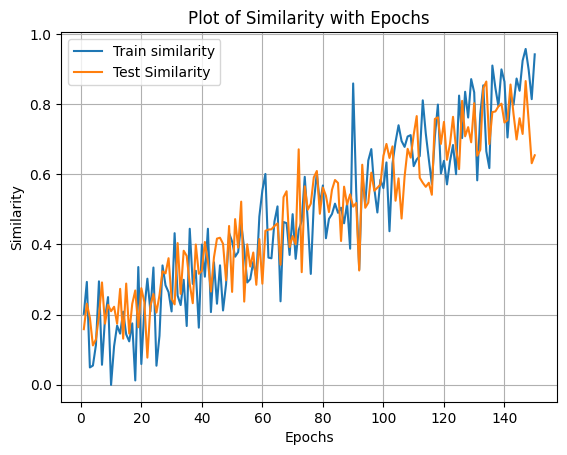

In [4]:
plt.plot(epochs, simil_train, marker='', linestyle='-', label='Train similarity')
plt.plot(epochs, simil_test, marker='', linestyle='-', label='Test Similarity')  # Adding another line

# Add labels, title, and legend
plt.xlabel('Epochs')
plt.ylabel('Similarity')
plt.title('Plot of Similarity with Epochs')
plt.legend()

# Display the plot
plt.grid(True)
plt.show()